# Métodos de ensembles 

## Introducción.

```{index} ensembles,bagging, boosting
```
En apartados anteriores se han explicado diversos métodos supervisados de machine learning, que permitían bien hacer una clasificación o una predicción mediante regresión. Cada uno de estos métodos tenían sus pros y sus contras.

Con los métodos denominados de ensambles o también denominados de **combinación de algoritmos simples**, lo que se trata es obtener información de diversos métodos de predicción o clasificación y mejorar el ajuste buscado. De forma general, estos métodos se pueden agrupar en dos grandes bloques: bagging y boosting y los mismos son muy populares dentro del muundo de machine learning, siendo muy utilizados en competiciones online como <a href="https://www.kaggle.com/" target="_blank">Kaggle</a>.  

Una clasificación un poco más exhaustiva de estos sistemas de aprendizaje se puede ver en la siguiente imagen

![resumenEnsamble.PNG](figuras/resumenEnsamble.PNG)

Entre los métodos de aprendizaje que combinan varios sistemas de predicción, se encuentran XGBoost, Random Forest o AdaBoost

Estos sistemas de algoritmos ensamblados consisten básicamente en unir varios algoritmos más simples con la finalidad de obtener un algoritmo más potentes que mejores la acuracidad del modelo que se está construyendo, es decir, se basan en el principio popular de que "la unión hace la fuerza" como lo pueden confirmar estos algoritmos ensamblados.

Como ya se ha dicho anteriormente hay muchas formas de ensamblar o unir algoritmos más débiles para formar otro  más potente y de mayor fiabilidad, pero entre los más usados y populares son los denominados de tipo **bagging** y de tipo **boosting**.

## Bagging.

```{index} pasting
```

Los algorimos de tipo bagging (*bootstrap aggregation*), fue propuesto por Breiman en 1996, con el cual se reduce la varianza y se basa en utilizar técnicas de tipo <a herf="https://es.wikipedia.org/wiki/Bootstrapping_(estad%C3%ADstica)" target="_blank"> bootstrap </a>  junto con un modelo de regresión o de clasificación. Si en vez de utilizar técnicas de remuestreo con reemplazamineto, lo hacemos con muestreo SIN reemplazamiento entonces el método se se domina *Pasting*.

La idea que subyace en la creación de este tipo de modelos es la siguiente.Si disponemos de muchas muestras de entrenamiento (submuestreo con reemplazamiento-bagging- o sin reemplazamiento-pasting-), entonces se puede utilizar cada una de estas muestras para entrenar el modelo y hacer una predicción. Con este método, se tendrán tantas predicciones como modelos o muestras de entrenamiento. Cada una de estas muestras de entrenamiento se denomina en términos anglosajones *bootstrapped training data set*.

Para un modelo que tenga intrínsecamente poca variabilidad, como puede ser una regresión lineal, aplicar bagging puede ser poco interesante, ya que hay poco margen para mejorar el rendimiento. Por contra, es un método muy importante para los árboles de decisión, porque un árbol con mucha profundidad (sin podar) tiene mucha variabilidad: si modificamos ligeramente los datos de entrenamiento es muy posible que se obtenga un nuevo árbol completamente distinto al anterior; y esto se ve como un inconveniente. Por esa razón, en este contexto encaja perfectamente la metodología bagging.

Así, para árboles de regresión se hacen crecer muchos árboles (sin poda) y se calcula la media de las predicciones. En el caso de los árboles de clasificación lo más sencillo es sustituir la media por la moda y utilizar el criterio del voto mayoritario: cada modelo tiene el mismo peso y por tanto cada modelo aporta un voto. Además, la proporción de votos de cada categoría es una estimación de su probabilidad.

(errorbagging)=
### Estimación error de predicción con bagging.
```{index} bootstrap (muestra),out-of-bag,OOB
```
Utilizando este tipo de métodos, se puede obtener un error de predicción de una forma directa, utilizando el siguiente procedimiento. Una muestra de tipo bootstrap va a contener muchas observaciones repetidas y en promedio, sólo utiliza aproximadamente los dos tercios de los datos originales para formar esa muestra. Entonces teniendo esto en cuenta y sabiendo que un dato que no se utiliza para construir el modelo se denomina *out-of-bag* (OOB), para cada observación se pueden utilizar los modelos para los que esa observación es out-of-bag (es decir en promedio un tercio de los modelos construidos) y así hacer una predicción de la misma. Repetiremos el proceso para todas las observaciones y se obtendría de esta manera una medida del error cometido.

Para obtener la agregación de las salidas de cada modelo simple e independiente, bagging puede usar la votación para los modelos de clasificación y el método del promedio para los métodos de regresión.

## Boosting.

Esta metodología se encuadra dentro de lo que genéricamente se conoce como *aprendizaje lento*, en el cual se combinan muchos modelos obtenidos mediante un método quizá con poca capacidad predictiva, para que la misma sea mejorada mediante etapas sucesivas y así incrementar la calidad final del predictor. Así por ejemplo los árboles de decisión construidos con poca profundidad y por lo tanto quizá con escasa capacidad predictiva pueden ser perfectos para esta tarea, ya que así son fáciles de combinar y su generación puede ser rápida.

Este tipo de métodos vieron su origen en el año 1984 gracias a los trabajos de Valiant y después fueron ampliados y mejorados por Kearns y Valiant en 1994. Sin embargo la implementación efectiva y práctica se logró mediante el algoritmo AdaBoost presentado en el año 1996 por Freund y Schapire.

ver este enlace https://rubenfcasal.github.io/aprendizaje_estadistico/boosting.html


## bagging vs boosting.

Una vez indicado en los apartados anteriores, las líneas maestras que vertebran los métodos de combinación de algoritmos, a continuación veamos cuales son las principales ventajas de estos algoritmos.

Dado que los métodos bagging se pueden entrenar de *forma independiente* para cada muestra utilizada, su principal ventaja radica en que todos los modelos que se construyan, se pueden hacer en paralelo, lo cual agiliza considerablemente el proceso a seguir, sobre todo cuando se está trabajando con una buena cantidad de datos

En el caso de los algoritmos boosting, los modelos simples utilizado se usan secuencialmente, por lo que aquí no se utilizará la programación en paralelo que hemos comentado para los modelos bagging. El principal objetivo de estos métodos secuenciales es el de aprovecharse de la dependencia que se establece entre los modelos simples. En este tipo de modelos, se mejora el rendimiento de los mismos creando un modelo simple posterior que dé más importancia a los errores cometidos por un modelo simple desarrollado previamente.

Por todo lo comentado anteriormente, la diferencia con los métodos bagging es que en el boosting los algoritmos no son independientes, el hijo depende del resultado del algoritmo padre, y en este sentido se van ponderando los errores que se cometen anteriormente.

<div style='display:none'>
[]: # Ver enlace https://machinelearningparatodos.com/cual-es-la-diferencia-entre-los-metodos-de-bagging-y-los-de-boosting/
</div>



## bagging (Bootstrap aggregating) en Scikip Learn.

Recordemos previamente que esta técnica, tiene como rasgos principales los siguientes aspectos:

* Se remuestrea repetidamente el conjunto de datos de entrenamiento.

* Con cada conjunto de datos se entrena un modelo.

* Las predicciones se obtienen promediando las predicciones de los modelos (la decisión mayoritaria en el caso de clasificación).

* Se puede estimar la precisión de las predicciones con el error OOB (out-of-bag).

La técnica de bagging se puede implementar en Scikip Learn, gracias a dos clases: [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) y [BaggingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html).

Mirando la documentación de cada una de estas clases, se puede observar que las dos tienen como parámetro *oob_score*, el cual admite un valor booleano, para indicar si queremos que se utilice la técnica de OOB (out-of-bag) [ya explicada en un apartado anterior](errorbagging), para estimar el error o no.

Veamos a continuación un ejemplo de uso de BaggingClassifier en Scikip Learn

### Ejemplo de BaggingClassifier.

En este ejemplo vamos realizar en primer lugar una clasificación usando sólo el algoritmo LogisticRegression. Sobre este modelo calcularemos algunos parámetros de la bondad del ajuste, y posteriormente haremos un ensamble de métodos utilizando para ello BaggingClasiifier con estimador base LogistidRegression. Al final podremos ver las diferencias entre ajustar un modelo u otro.

In [125]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

Comenzamos por cargar los datos de breast cancer, que ya vienen dentro de paquete de scikit learn.

In [126]:
datos = datasets.load_breast_cancer()
X = datos.data
y = datos.target
X.shape

(569, 30)

Este fichero contiene un total de 30 variables numéricas, observadas sobre determinados enfermos de cáncer, 569 samples o muestras, y dos tipos diferentes de target o clases a clasificar. Veamos algunos ejemplos de esto.

In [127]:
# Veamos los valores que hay en la variable target

unique, counts = np.unique(y, return_counts=True)

np.asarray((unique, counts)).T

array([[  0, 212],
       [  1, 357]], dtype=int64)

Generamos los datos de entrenamiento y de test

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

Estandarizamos los datos y luego realizamos la clasificación mediante una regresión logic. Para agilizar este proceso lo hacemos mediante la clase pipeline, que se utiliza para hacer una agrupación de operaciones y hacerlo de una forma secuencial, de forma que la salida de una operación es la entrada de la siguiente (es lo que se conoce como tubería de operaciones).

In [129]:
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))

In [130]:
# Ajustamos el modelo
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=1))])

In [131]:
print('Modelo test Score: %.3f, ' %pipeline.score(X_test, y_test),
      'Modelo training Score: %.3f' %pipeline.score(X_train, y_train))

Modelo test Score: 0.965,  Modelo training Score: 0.991


Notemos que se aprecia un pequeño overfitting en el modelo, ya que el score es de 0.991 para el entrenamiento y para el test, 0.965

In [132]:
## Creamos la matrices de confusión
from sklearn.metrics import confusion_matrix

print("matriz de confusión para train")
y_pred_train = pipeline.predict(X_train)

print(confusion_matrix(y_pred_train, y_train))

print("\n matriz de confusión para test")
y_pred_test = pipeline.predict(X_test)

confusion_matrix(y_pred_test, y_test)

matriz de confusión para train
[[156   1]
 [  3 266]]

 matriz de confusión para test


array([[50,  2],
       [ 3, 88]], dtype=int64)

Hagamos ahora esto mismo, pero utilizando para ello un clasificador Bagging. Utilizamos para hacer esto los siguientes hiperparámateros:

* n_estimators = 100

* max_features = 10

* max_samples = 100

In [ ]:
# Creamos el pipeline
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))

In [133]:
# Ahora definimos nuestro clasificador Bagging
bgclasificador = BaggingClassifier(base_estimator=pipeline, n_estimators=100,
                                 max_features=10,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)

In [134]:
# Ajustamos el modelo
bgclasificador.fit(X_train, y_train)

BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('logisticregression',
                                                  LogisticRegression(random_state=1))]),
                  max_features=10, max_samples=100, n_estimators=100, n_jobs=5,
                  random_state=1)

Veamos la salida del score, para poder comparar con el modelo anterior

In [135]:
print('Modelo test Score: %.3f, ' %bgclasificador.score(X_test, y_test),
      'Modelo training Score: %.3f' %bgclasificador.score(X_train, y_train))

Modelo test Score: 0.958,  Modelo training Score: 0.972


Podemos ver que a diferencia del anterior modelo, se ha corregido el pequeño overfiting que habíamos visto antes y por lo tanto, tendrá una mejor generalización del mismo que lo obtenido en el ejemplo anterior.

In [136]:
print("matriz de confusión para train")
y_pred_train = bgclasificador.predict(X_train)

print(confusion_matrix(y_pred_train, y_train))

print("\n matriz de confusión para test")
y_pred_test = bgclasificador.predict(X_test)

confusion_matrix(y_pred_test, y_test)

matriz de confusión para train
[[148   1]
 [ 11 266]]

 matriz de confusión para test


array([[48,  1],
       [ 5, 89]], dtype=int64)

Como ejercicio para que el lector práctique con este ejemplo, se aconseja utilizar las clases  [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) y [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) para localizar hiperparámetros que intenten mejorar los resultados.

En lugar de utilizar un modelo de regresión logit, utilizar otro modelo de clasificación, y observar si se mejora o empeoran los resultados.

### Ejemplo de BaggingRegressor.

En este ejemplo vamos a construir un modelo utilizando BaggingRegressor para comprobar la ganancia que se obtiene con este tipo de técnicas. 

En concreto se trata de crear un modelo de datos artificial, con la finalidad de ver qué errores se obtienen al aplicar diferentes modelos sobre los datos previamente generados y más en concreto, cómo queda la descomposición de esos errores en las tres componentes siguientes que conforman el error: sesgo, varianza y ruido aleatorio 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
# ajustes. Definimos los parámetros que configuran el modelo
n_repeat = 50 # numero de iteraciones
n_train = 50 # tamaño del set de entrenamiento
n_test = 1000 # tamaño del set de test
noise = 0.1 # desviacion estander de ruido
np.random.seed(0)

In [3]:
# Se propone al lector cambiar esto por explorar la descomposición sesgo-varianza de otros 
# estimadores. Esto debería funcionar bien para estimadores con alta varianza (por ejemplo, 
# árboles de decisión o KNN), pero mal para estimadores con baja varianza (por ejemplo, 
# modelos lineales).
estimators = [("Tree", DecisionTreeRegressor()), ("Bagging(Tree)", BaggingRegressor(DecisionTreeRegressor()))]
 
n_estimators = len(estimators)

In [4]:
# función para la generacion de datos
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

In [6]:
# generación de muestras
def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)
 
    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))
 
        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)
 
    X = X.reshape((n_samples, 1))
 
    return X, y

In [7]:
#creamos los datos de entrenamiento
 
X_train = []
y_train = []
 
for i in range(n_repeat):
    X, y = generate(n_samples=n_train, noise=noise)
    X_train.append(X)
    y_train.append(y)

In [8]:
# Los datos de test
X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)

Procedemos a continuación a generar las figuras correspondientes

Tree: 0.0255 (error) = 0.0003 (bias^2)  + 0.0152 (var) + 0.0098 (noise)
Bagging(Tree): 0.0196 (error) = 0.0004 (bias^2)  + 0.0092 (var) + 0.0098 (noise)


Substituting symbol E from STIXNonUnicode
Substituting symbol E from STIXNonUnicode


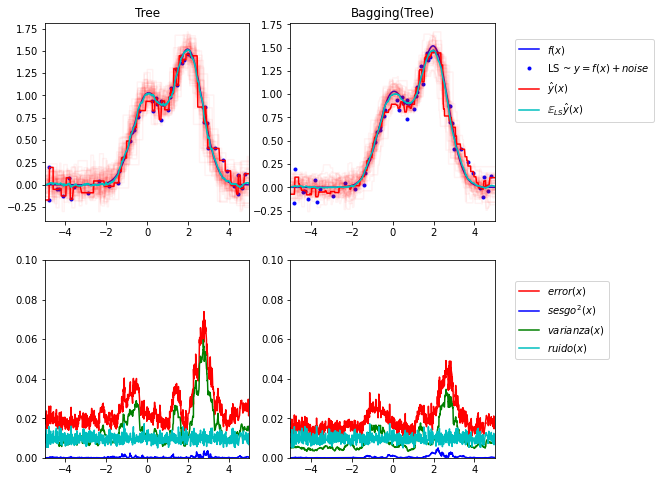

In [9]:
plt.figure(figsize=(10, 8))
# Estimadores de bucle para comparar
for n, (name, estimator) in enumerate(estimators):
  # computacion de predicciones
  y_predict = np.zeros((n_test, n_repeat))
 
  for i in range(n_repeat):
    estimator.fit(X_train[i], y_train[i])
    y_predict[:, i] = estimator.predict(X_test)
  #sesgo^2 + Variación + Descomposición del ruido del error promedio al cuadrado
  y_error = np.zeros(n_test)
 
  for i in range(n_repeat):
    for j in range(n_repeat):
        y_error += (y_test[:, j] - y_predict[:, i]) ** 2
 
  y_error /= (n_repeat * n_repeat)
 
  y_noise = np.var(y_test, axis=1)
  y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2
  y_var = np.var(y_predict, axis=1)
 
  print("{0}: {1:.4f} (error) = {2:.4f} (bias^2) "" + {3:.4f} (var) + {4:.4f} (noise)".
        format(name, np.mean(y_error), np.mean(y_bias), np.mean(y_var), np.mean(y_noise)))
 
  # representamos figuras
  plt.subplot(2, n_estimators, n + 1)
  plt.plot(X_test, f(X_test), "b", label="$f(x)$")
  plt.plot(X_train[0], y_train[0], ".b", label="LS ~ $y = f(x)+noise$")
 
  for i in range(n_repeat):
    if i == 0:
      plt.plot(X_test, y_predict[:, i], "r", label="$\^y(x)$")
    else:
      plt.plot(X_test, y_predict[:, i], "r", alpha=0.05)
 
  plt.plot(X_test, np.mean(y_predict, axis=1), "c", label="$\mathbb{E}_{LS} \^y(x)$")
 
  plt.xlim([-5, 5])
  plt.title(name)
 
  if n == n_estimators - 1:
    plt.legend(loc=(1.1, .5))
 
  plt.subplot(2, n_estimators, n_estimators + n + 1)
  plt.plot(X_test, y_error, "r", label="$error(x)$")
  plt.plot(X_test, y_bias, "b", label="$sesgo^2(x)$"),
  plt.plot(X_test, y_var, "g", label="$varianza(x)$"),
  plt.plot(X_test, y_noise, "c", label="$ruido(x)$")
 
  plt.xlim([-5, 5])
  plt.ylim([0, 0.1])
 
  if n == n_estimators - 1:
 
    plt.legend(loc=(1.1, .5))
 
plt.subplots_adjust(right=.75)
plt.show()

Como resumen de todo el código y con el fin de ayudar a la interpretación del mismo, se puede decir lo siguiente.

En este ejemplo se generan una serie de números en base a la función denominada n_samples() y posteriormente se hace un ajuste de regresión, y se mejora el ajuste mediante una técnica Bagging.

En este tipo de análisis de regresión, el error cuadrático medio de un estimador, se considera que puede descomponerse en términos de sesgo ( desviación de los datos respecto de su media), varianza y ruido (es lo que sacamos en los dos gráficos inferiores).  

En la figura superior izquierda se muestran las predicciones ( en rojo oscuro) de un único árbol de decisión entrenado sobre un conjunto de datos aleatoria (son los puntos azules). Sin embargo el gráfico superior derecho muestra el ajuste utilizando un procedimiento Bagging.

Los dos gráficos de la parte inferior, contienen la descomposición del error en términos de sesgo, varianza y ruido. De acuerdo con estos últimos gráficos podemos ver que:

* El error cometido con el método ensamble es menor, ya que la gráfica en rojo de la derecha queda por debajo de esa misma gráfica de la zona izquierda.

* Lo que más contribuye al error es la varianza (en color verde).

* El sesgo es apenas perceptible en los dos casos.

* El ruido del modelo está en unos niveles similares en los dos modelos, debido a la característica propia del modelo con el que se ha construido.

## Método AdaBoost.

```{index} AdaBoost
```
Este método se basa en un proceso iterativo, en el cual se aplica un clasificador en cada paso, pero al pasar de una etapa a la siguiente, se presta una mayor atención a los puntos mal clasificados en la etapa anterior. 

En Yutube, [se recomienda ver este vídeo](https://www.youtube.com/watch?v=LsK-xG1cLYA) que aclara la base de este algoritmo.

```{index} Decicision Stump
```

Así pues para todo este se necesita un clasificador de base, que en el caso de scikit learn, se utiliza por defecto el denominado *Decision Stump*, que no es más que un árbol de decisión con el parámetro max_depth = 1, es decir un árbol compuesto de un solo nodo de decisión con dos hojas finales.

![stump](figuras/stump.PNG)

En este sentido el ciclo que seguiría este algoritmo sería el siguiente en el caso de construir un AdaBoost classifier. Se comienza el ciclo entrenando un clasificador base (por ejemplo un árbol de decisión) y con el mismo se obtienen el conjunto de predicciones de los datos de entrenamiento. Entonces en el segundo paso, el peso relativo de las observaciones mal clasificadas es incrementado (y por ende, como la suma de los pesos totales es uno, se disminuye el de observaciones bien clasificadas), y a continuación se entrena el mismo clasificador pero con los nuevos pesos y se hacen las correspondientes predicciones, los pesos son actualizados como ya se ha hecho en la etapa anterior, y así se continua el ciclo hasta terminar el proceso iterativo. 


<div style='display:none'>
ver https://rubenfcasal.github.io/aprendizaje_estadistico/boosting.html
</div>    

A continuación vamos a generar una serie de gráficos que visualizan el proceso de mejora del ajuste que se obtiene al utilizar la técnica de AdaBoost.

Comenzamos por importar las librerías que vamos a necesitar.

In [8]:
import sklearn

# importamos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Generamos los datos y a continuación procedemos a hacer su representación gráfica

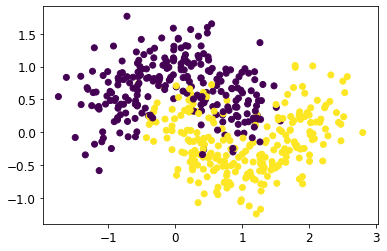

In [12]:
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

Lo primero que vamos a hacer es obtener un ajuste AdaBoost, utilizando como estimador de base un clasificador de tipo árbol de decisión básico, con un sólo nivel de profundidad. En este paso se le indica con el parámetro *n_estimators* un total de 200 pasos

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

A continuación creamos una función de conveniencia que nos será útil para trabajos posteriores para poder dibujar las zonas y fronteras de decisión con el estimador que se le pase como parámetro.

Una vez definida la función procedemos a hacer la representación gráfica de las fronteras de decisión que se obtienen en base al modelo generado anteriormente.

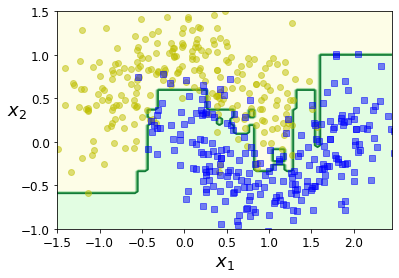

In [106]:
from matplotlib.colors import ListedColormap
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True ,color=0):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        colores = ['Greens','Blues','Greys','Reds']
        plt.contour(x1, x2, y_pred, cmap=colores[color], alpha=0.8)

    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    
    
plot_decision_boundary(ada_clf, X, y)

Una vez hecha la primera presentación del método, a continuación nos disponemos a obtener el resultado que vamos buscando, es decir ver cómo va mejorando la clasificación con el método AdaBoost a medida que vamos incrementado el número de pasadas. Es to se va a ver claro con los gráficos que se generan con el siguiente código.

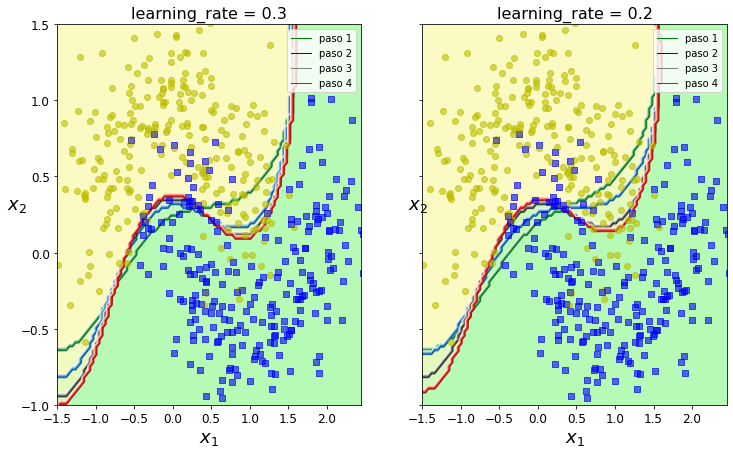

In [108]:
from sklearn.svm import SVC
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color='green', lw=1),
                Line2D([0], [0], color='blue', lw=1),
                Line2D([0], [0], color='grey', lw=1),
                Line2D([0], [0], color='red', lw=1),
               ]

m = len(X_train)

fix, axes = plt.subplots(ncols=2, figsize=(12,7), sharey=True)
for subplot, learning_rate2 in ((0, 0.3), (1, 0.2)):
    sample_weights = np.ones(m)
    plt.sca(axes[subplot])
    for i in range(5,9):
        ada_clf2 = AdaBoostClassifier(
        SVC(kernel="rbf", C=0.05, gamma="scale",probability=True),   
        n_estimators=i,
        learning_rate = learning_rate2,   
        algorithm="SAMME.R",
        random_state = 4)
        
        ada_clf2.fit(X_train, y_train)
        
        plot_decision_boundary(ada_clf2, X, y, alpha=0.2,color=i-5)
        plt.title("learning_rate = {}".format(learning_rate2), fontsize=16)
        
    plt.legend(custom_lines, ['paso 1', 'paso 2', 'paso 3','paso 4'])

plt.show()


Como puede verse en los gráficos anteriores (uno para una tasa de aprendizaje de 0.3 y el otro de 0.2), a medida que se van incrementando los pasos, las curvas que delimitan las dos zonas de clasificación de los puntos, se van ajustando cada vez más y por lo tanto mejorando el ajuste que vamos buscando.

Para apreciar aún con mayor detalle esta mejora en la clasificación a medida que incrementamos el número de pasos en el estimador, vamos a ver otro ejemplo similar al anterior pero en este caso, utilizando como estimador  de base un árbol de decisión. 

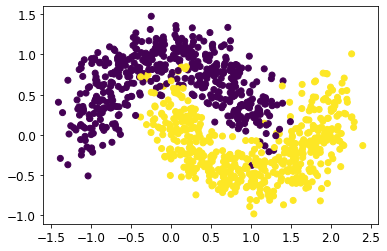

In [110]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_moons
N = 1000
X,Y = make_moons(N,noise=0.2)
plt.scatter(X[:,0],X[:,1], c=Y)
plt.show()

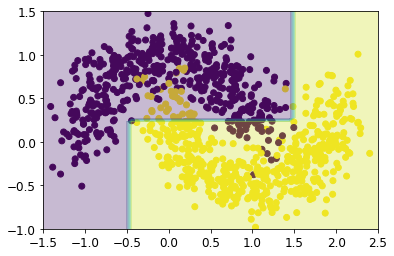

In [111]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X,Y)
xx,yy = np.meshgrid(np.linspace(-1.5,2.5,50),np.linspace(-1,1.5,50))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X[:,0],X[:,1], c = Y)
plt.contourf(xx,yy,Z,alpha=0.3)
plt.show()

Teniendo como base el anterior clasificador, procedemos a continuación a mejorar la clasificación viendo cómo queda esta clasificación después de realizar una serie de pasos.

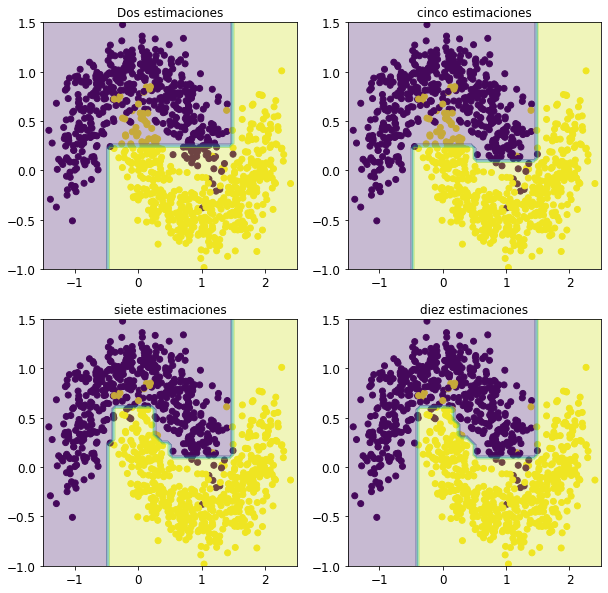

In [121]:
fig,aux = plt.subplots(2,2, figsize=(10,10))

ada = AdaBoostClassifier(clf, n_estimators=2, learning_rate=0.1)
ada.fit(X,Y)
xx,yy = np.meshgrid(np.linspace(-1.5,2.5,50),np.linspace(-1,1.5,50))
Z = ada.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
aux[0,0].scatter(X[:,0],X[:,1], c = Y)
aux[0,0].contourf(xx,yy,Z,alpha=0.3)
aux[0,0].title.set_text("Dos estimaciones")

ada = AdaBoostClassifier(clf, n_estimators=5, learning_rate=0.1)
ada.fit(X,Y)
xx,yy = np.meshgrid(np.linspace(-1.5,2.5,50),np.linspace(-1,1.5,50))
Z = ada.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
aux[0,1].scatter(X[:,0],X[:,1], c = Y)
aux[0,1].contourf(xx,yy,Z,alpha=0.3)
aux[0,1].title.set_text("cinco estimaciones")

ada = AdaBoostClassifier(clf, n_estimators=7, learning_rate=0.1)
ada.fit(X,Y)
xx,yy = np.meshgrid(np.linspace(-1.5,2.5,50),np.linspace(-1,1.5,50))
Z = ada.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
aux[1,0].scatter(X[:,0],X[:,1], c = Y)
aux[1,0].contourf(xx,yy,Z,alpha=0.3)
aux[1,0].title.set_text("siete estimaciones")

ada = AdaBoostClassifier(clf, n_estimators=10, learning_rate=0.1)
ada.fit(X,Y)
xx,yy = np.meshgrid(np.linspace(-1.5,2.5,50),np.linspace(-1,1.5,50))
Z = ada.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
aux[1,1].scatter(X[:,0],X[:,1], c = Y)
aux[1,1].contourf(xx,yy,Z,alpha=0.3)
aux[1,1].title.set_text("diez estimaciones")

plt.show()

Es evidente que al ir incrementando el número de etapas del algoritmo el número de puntos mal clasificados va reduciéndose y por lo tanto mejorando el ajuste. 

### Método de ajuste.

Supongamos que tenemos m instancias, es decir m observaciones o m filas en nuestro dataset. Entonces a cada instancia le damos un peso $w^{(i)}$. Observar que con la notación i nos estamos refiriendo a la instancia i-ésima. En una primera pasada, todas instancias tendrán el mismo peso igual a $\frac{1}{m}$.

Entonces con estos condicionantes, un primer predictor es entrenado, y con los errores que se cometan en este predictor, se calculan los porcentajes de errores cometidos, ponderados con los pesos que se tengan para ese predictor. Es decir se calculará para cada predictor la denominada tasa de error $t_j$ de la siguiente manera:

$$r_{j}=\frac{\sum_{i=1,\hat{y}_{j}^{(i)}\neq y^{(i)}}^{m}W^{(i)}}{\sum_{i=1}^{m}W^{(i)}}$$

Observemos que con la notación empleada con el índice j nos estamos refiriendo a la predicción en la etapa j y con el índice i a la instancia i-ésima. 

En la fórmula anterior, $\hat{y}_{j}^{(i)}$ hace referencia a la predicción en la etapa j-ésima, es decir la que se obtiene con el j-ésimo predictor para la instancia i-ésima. Entonces de acuerdo con esta notación, en el numerador de la fórmula anterior lo que estamos sumando son los pesos de las instancias en las que el predictor se equivoca, y lo dividimos por la suma total de los pesos.

Una vez calculado este valor para la etapa j-ésima, se calcularía el valor de $\alpha_j$ mediante la siguiente fórmula.

$$\alpha_{j}=\eta\cdot log\frac{1-r_{j}}{r_{j}}$$

```{index} tasa de aprendizaje, learning rate
```

Donde $\eta$ se denomina tasa de aprendizaje (learning rate en terminología anglosajona)

Veamos ante de seguir adelante cual es la representación gráfica de esta función:

![grafica](figuras/grafica.PNG)

De acuerdo con la figura anterior podemos concluir que cuando la tasa de error es alta, es decir cercana a uno entonces, el valor de $\alpha_{j}$ toma valores negativos y tiende hacia menos infinito cuanto más cerca de uno se encuentre. Por el lado contrario, si hay pocos errores, entonces la tasa de error estará cercana a cero y en consecuencia $\alpha_{j}$ tomará valores positivos, más altos cuanto más se acerque a cero la tasa de error.

De acuerdo con esta consideraciones, ahora lo que procede es calcular los nuevos pesos para cada instancia i (i=1,2,....m), de tal manera que si en la etapa j-ésima no ha habido error de clasificación entonces se asigna el mismo pesos que tenía anteriormente, en caso contrario, el peso se incrementa de la siguiente manera:$W^{(i)}\cdot exp(\alpha_j)$.

Es decir los nuevos pesos se asignan según lo indicado a continuación.

$$
W^{(i)}\longleftarrow\begin{cases}
W^{(i)} & si\ \hat{y}_{j}^{(i)}=y^{(i)}\\
W^{(i)}\cdot exp(\alpha_{j}) & si\ \hat{y}_{j}^{(i)}\neq y^{(i)}
\end{cases}
$$

Pero como estamos hablando de pesos, todos los valores anteriores son normalizados, es decir se dividen por $\sum_{i=1}^{m}w^{(i)}$.

Finalmente, un nuevo predictor es obtenido utilizando estos pesos nuevos, y se vuelve a repetir de nuevo todo el proceso, hasta que finalice el número de ciclos que se le haya indicado o cuando se tenga una cierta convergencia del proceso.

Para hacer la predicción final, el algoritmo AdaBoost computa todas las predicciones hechas con este procedimiento indicado anteriormente y la predicción final la hace vía voto mayoritario, es decir:

$$\hat{y}(x)=argmax_{k}\sum_{j=1,\hat{y}_{j}(x)=k}^{N}\alpha_{j}$$

Donde N es el número total de predictores empleados.

### Adabost en Scickit Learn.

Como es habitual en Scickit Learn, se pueden utilizar dos versiones de esta metodología, una para clasificación y otra para regresión:  [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) y [AdaBoostRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html) respectivamente. 

En la relación anterior se han añadido los link correspondientes donde se pueden ver los parámetros y atributos que poseen ambas clases para trabajar con ellas, por lo que no se cree oportuno profundizar más en esta cuestión, ahora bien, si se cree oportuno comentar que Scikit Learn usa uan versión de AdaBoost denominada SAMME, y además con el parámetro *algorithm* existe también la posibilidad de utilizar una variante de SAMME denominada *SAMME.R* que se basa en probabilidades de clase en lugar de predicciones y generalmente tiene un mejor rendimiento

### Ejemplos con Scikit Learn.

A continuación vamos a ir mostrando una serie de ejemplos que ayudan a entender cómo utilizar este algoritmo con Scikit Learn.

El primer ejemplo va a consistir en hacer una predicción con un arbol de decisión  de profundidad 1 (modelo stump definido anteriormente), y calculamos la acuracidad obtenida. Después utilizaremos este mismo modelo como base dentro de un modelo AdaBoost y veremos cuanto mejoramos esta acuracidad.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostClassifier
#
# Cargamos el conjunto de datos breast cancer 
#
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target
#
# Creamos los conjuntos de emtrenamiento y test
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
#
# Creamos el pipeline
#
pipeline = make_pipeline(StandardScaler(),
                        DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1))
#
# ajuste del modelo
#
pipeline.fit(X_train, y_train)
#
# Model scores on test and training data
#
print('Modelo test Score: %.3f, ' %pipeline.score(X_test, y_test),
      'Modelo training Score: %.3f' %pipeline.score(X_train, y_train))

Modelo test Score: 0.916,  Modelo training Score: 0.915


Como podemos ver el modelo obtenido ofrece una buena acuracidad y además los valores de la misma son muy similares tanto para el conjunto de entrenamiento como de test, por lo que se podría concluir que puede ser un buen modelo con buenas perspectivas para ser generalizado a cualquier conjunto de datos.

Veamos no obstante si ahora esas tasas de acierto las podemos mejorar utilizando un modelo de tipo AdaBoost.

In [2]:
#
# Estandarizamos el conjunto de datos
#
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
#
# Creamos el clasificador anterior que será la base de AdaBoost
#
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1)
#
# Creamos el clasificador AdaBoost
#
adbclassifier = AdaBoostClassifier(base_estimator=dtree,
                                   n_estimators=100,
                                   learning_rate=0.0005,
                                   algorithm = 'SAMME',
                                   random_state=1)
#
# Ajustamos el modelo
#
adbclassifier.fit(X_train, y_train)
#
# Sacamos la acuracidad del modelo
#
print('Modelo test Score: %.3f, ' %adbclassifier.score(X_test, y_test),
      'Modelo training Score: %.3f' %adbclassifier.score(X_train, y_train))

Modelo test Score: 0.937,  Modelo training Score: 0.923


Como podemos observar, se ha obtenido una mayor acuracidad tanto para el conjunto de datos de entrenamiento como de test, y además la generalización del modelo también es bastante aceptable.

## Gradient Boosting.

```{index} Gradient Boosting
```
Otro popular método boosting es el denominado *Gradient Boosting*, el cual se genera mediante un conjunto de árboles de decisión individuales, que son entrenado de forma secuencial, de tal manera que cada nuevo árbol creado trata de mejorar los errores de los árboles anteriores. La predicción de una observación se obtiene agregando las predicciones de todos los árboles individuales que conforman el modelo.

<div style='display:none'>
https://www.cienciadedatos.net/documentos/py09_gradient_boosting_python.html
</div>

Gradient Boosting es muy parecido al algoritmo AdaBoost ya que permite emplear cualquier función de coste, siempre que esta sea diferenciable. La flexibilidad de este algoritmo ha hecho posible aplicar boosting a multitud de problemas (regresión, clasificación múltiple...) convirtiéndolo en uno de los métodos de machine learning de mayor éxito. Si bien existen varias adaptaciones, la idea general de todas ellas es la misma: entrenar modelos de forma secuencial, de forma que cada modelo ajusta los residuos (errores) de los modelos anteriores.

Se ajusta un primer *weak learner* $f_{1}$ con el que se predice
la variable respuesta y , y se calculan los residuos $y-f_{1}(x)$
. A continuación, se ajusta un nuevo modelo $f_{2}$ , que intenta
predecir los residuos del modelo anterior, en otras palabras, trata
de corregir los errores que ha hecho el modelo $f_{1}$ .

$$
f_{1}(x)\approx y
$$

$$
f_{2}(x)\thickapprox y-f_{1}(x)
$$

En la siguiente iteración, se calculan los residuos de los dos modelos
de forma conjunta $y-f_{1}(x)-f_{2}(x)$ , los errores cometidos por
$f_{1}$ y que $f_{2}$ que no ha sido capaz de corregir, y se ajusta
un tercer modelo $f_{3}$ para tratar de corregirlos.

$$
f_{3}(x)\thickapprox y-f_{1}(x)-f_{2}(x)
$$

Este proceso se repite M veces, de forma que cada nuevo modelo minimiza
los residuos (errores) del anterior.

Dado que el objetivo de Gradient Boosting es ir minimizando los residuos
iteración a iteración, es susceptible de overfitting. Una forma de
evitar este problema es empleando un valor de regularización, también
conocido como *learning rate* ( $\lambda$ ), que limite la
influencia de cada modelo en el conjunto del ensemble. Como consecuencia
de esta regularización, se necesitan más modelos para formar el ensemble
pero se consiguen mejores resultados.

$$
f_{1}(x)\approx y
$$

$$
f_{2}(x)\thickapprox y-\lambda\cdot f_{1}(x)
$$

$$
f_{3}(x)\thickapprox y-\lambda\cdot f_{1}(x)-\lambda\cdot f_{2}(x)
$$

$$
y\thickapprox\lambda f_{1}(x)+\lambda f_{2}(x)+.....+\lambda f_{m}(x)
$$

Para clarificar esta idea, a continuación procedemos a mostrar un ejemplo, en el que se puede ver en acción el fundamento del algoritmo Gradient Boosting

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
%matplotlib inline
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [2]:
# Generamos los números aleatorios
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [3]:
from sklearn.tree import DecisionTreeRegressor

# Ajustamos mediante un árbol de decisión
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [4]:
# Obtenemos los residuos de la prdicción anterior
y2 = y - tree_reg1.predict(X)
# Ajustamos de nuevo los residuos
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

repetimos el proceso anterior

In [5]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

Lo que hemos obtenido es  un conjunto que contiene tres árboles. Se Pueden hacer predicciones sobre una nueva instancia simplemente sumando las predicciones de todos los árboles obtenidos con este procedimiento:

In [6]:
X_new = np.array([[0.8]])

In [7]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.75026781])

La figura siguiente representa las predicciones de estos tres árboles en la columna de la izquierda, y las predicciones del conjunto en la columna de la derecha. 

En la primera fila, el conjunto sólo tiene un árbol, por lo que sus predicciones son exactamente las mismas que las del primer árbol. 

En la segunda fila, se entrena un nuevo árbol con los errores residuales del primer árbol. A la derecha puede ver que las predicciones del conjunto son iguales a la suma de las predicciones de los dos primeros árboles.

Del mismo modo, en la tercera fila se entrena otro árbol con los errores residuales del segundo árbol. Puede ver que las predicciones del conjunto mejoran gradualmente a medida que se añaden árboles al conjunto.


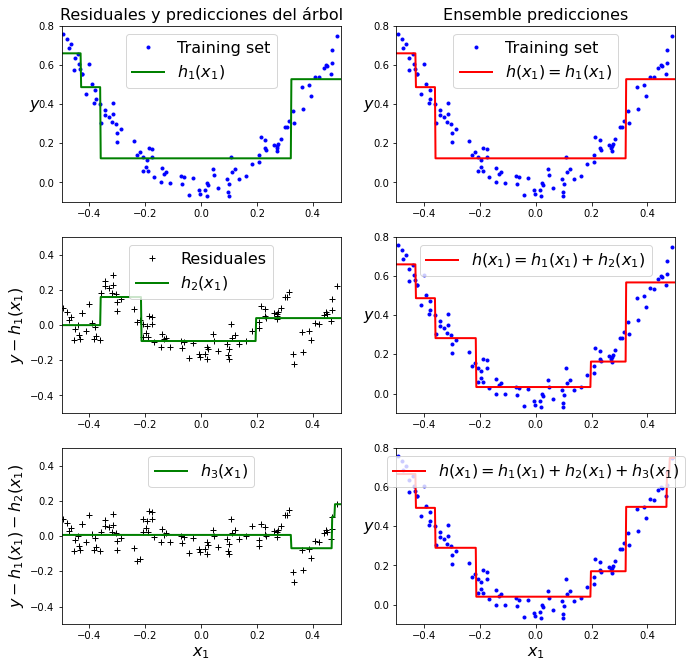

In [10]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuales y predicciones del árbol", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predicciones", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuales")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)


plt.show()

Veamos a continuación, cómo aplicar esta técnica de forma directa utilizando la clase *GradientBoostingClassifier* al conjunto de datos titanic.csv 

In [12]:
df = pd.read_csv('data/titanic.csv').dropna()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


Sacamos los niveles de cada categoría usando para ello *'select_dtypes'*.

In [13]:
dfo = df.select_dtypes(include=['int64', 'object'])
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending=False)
vn

,VarName,LevelsCount
0,PassengerId,183
1,Survived,2
2,Pclass,3
3,Name,183
4,Sex,2
5,SibSp,4
6,Parch,4
7,Ticket,127
8,Cabin,133
9,Embarked,3


Creamos variables dummies y no nos olvidamos de borrar las variables originales que corresponden

In [14]:
df = pd.DataFrame(df.drop(dfo.columns,axis =1)).merge(pd.get_dummies(dfo.drop(['Name','Cabin','Ticket'],axis =1)),left_index=True,right_index=True).drop(['PassengerId'],axis =1)
print(df.shape)
df.head()

(183, 11)


,Age,Fare,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,38.0,71.2833,1,1,1,0,1,0,1,0,0
3,35.0,53.1000,1,1,1,0,1,0,0,0,1
6,54.0,51.8625,0,1,0,0,0,1,0,0,1
10,4.0,16.7000,1,3,1,1,1,0,0,0,1
11,58.0,26.5500,1,1,0,0,1,0,0,0,1


In [15]:
# veamos cuántos valores null tenemos
df.isnull().sum()

Age           0
Fare          0
Survived      0
Pclass        0
SibSp         0
Parch         0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [16]:
# Creamos las variables dependientes e independientes

X = df.drop('Survived', axis=1)
y = df['Survived']

In [17]:
# Estandarizamos los datos
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [18]:
# Obtenemos train y test datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracidad score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracidad score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracidad score (training): 0.737
Accuracidad score (validation): 0.609

Learning rate:  0.1
Accuracidad score (training): 0.810
Accuracidad score (validation): 0.696

Learning rate:  0.25
Accuracidad score (training): 0.839
Accuracidad score (validation): 0.717

Learning rate:  0.5
Accuracidad score (training): 0.861
Accuracidad score (validation): 0.783

Learning rate:  0.75
Accuracidad score (training): 0.883
Accuracidad score (validation): 0.696

Learning rate:  1
Accuracidad score (training): 0.920
Accuracidad score (validation): 0.783



Observamos que el major valor de acuracidad se obtiene para un learning rate de 1. Entonces trabajamos sobre este valor

In [20]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 1,
                                max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[12,  6],
       [ 4, 24]], dtype=int64)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71        18
           1       0.80      0.86      0.83        28

    accuracy                           0.78        46
   macro avg       0.78      0.76      0.77        46
weighted avg       0.78      0.78      0.78        46



In [22]:
false_positive, true_positive, threshold = roc_curve(y_test, y_pred)

En este tipo de problemas, la cuestión está en determinar el número de árboles de decisión óptimo para realizar bien la clasificación o la regresión que queremos ajustar. Para poder obtener este tipo de resultados, se hace interesante utilizar el método *staged_predict()* el cual devuelve un iterador sobre las predicciones hechas para uno, dos, tres... árboles de decisión. Veamos cómo poder conseguir esto 

In [23]:
# Generamos los números aleatorios
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

# Utilizamos el número de árboles que se ha obtenido anteriormente
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=56, random_state=42)

In [28]:
print("Número óptimo de árboles decisión: {}".format(bst_n_estimators))

Número óptimo de árboles decisión: 56


Veamos estos resultados de una forma gráfica

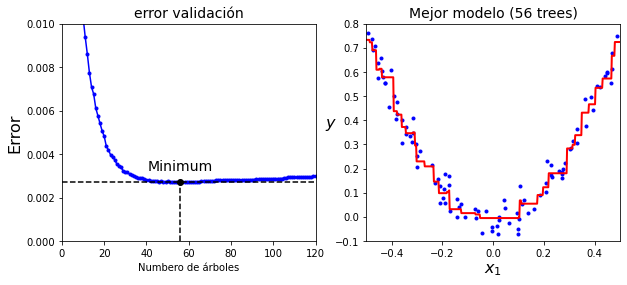

In [31]:
min_error = np.min(errors)

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(np.arange(1, len(errors) + 1), errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Numbero de árboles")
plt.ylabel("Error", fontsize=16)
plt.title("error validación", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Mejor modelo (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)


plt.show()


La clase *GradientBoostingRegressor* también admite un hiperparámetro para trabajar con submuestras, que especifica
la fracción de instancias de entrenamiento que se utilizará para el entrenamiento de cada árbol. Por ejemplo, si submuestra=0,25, entonces cada árbol se entrena con el 25% de las instancias de entrenamiento, seleccionadas al azar. 

Como fácilmente puede adivinarse ahora, esto cambia un sesgo más alto por una varianza más baja. También acelera considerablemente el entrenamiento. Esta técnica se denomina *refuerzo de gradiente estocástico*.

### Binning

```{index} thresholds
```

Uno de los grandes inconvenientes que genera una ralentización de *Gradient Boosting* es la búsqueda de los puntos de corte (*thresholds*). En este sentido para encontrar el threshold óptimo en cada división, en cada árbol, es necesario iterar sobre todos los valores observados de cada uno de los predictores. El problema no es que haya muchos valores que comparar, sino que requiere ordenar cada vez las observaciones acorde a cada predictor, proceso computacionalmente muy costoso.

La estrategia de <a href="https://en.wikipedia.org/wiki/Data_binning" target="_blank"> binning </a> trata de reducir este cuello de botella agilizando el ordenamiento de las observaciones mediante una discretización de sus valores. Normalmente se emplean los cuantiles para hacer una discretización homogénea en cuanto al número de observaciones que cae en cada intervalo. Como resultado de este proceso, el ordenamiento es varios órdenes de magnitud más rápido. El potencial inconveniente de la discretización es que se pierde parte de la información, ya que únicamente se contemplan como posibles thresholds los límites de cada bin.

Esta es la principal característica que hace que las implementaciones de XGBoost ( [se desarrolla más adelante](xgboost)), <a href="https://lightgbm.readthedocs.io/en/latest/Python-Intro.html" target="_blank"> LightGBM </a> e  HistGradientBoosting (verlo en scikit learn) sean mucho más rápida que la implementación original de scikitlearn GradientBoosting.



### Estrategia parada temprana (early stopping)

```{index} para temprana,  early stopping
```

Una de las características de los modelos Gradient Boosting es que, con el número suficiente de weak learners, el modelo final tiende a ajustarse perfectamente a los datos de entrenamiento causando overfitting. Este comportamiento implica que el analista tiene que encontrar el número adecuado de árboles y, para ello, suele tener que entrenar el modelo con cientos o miles de árboles hasta identificar el momento en el que empieza el overfitting. Esto suele ser poco eficiente en términos de tiempo, ya que, posiblemente, se estén ajustando muchos árboles innecesarios.

Para evitar este problema, la mayoría de implementaciones incluyen toda una serie de estrategias para detener el proceso de ajuste del modelo a partir del momento en el que este deja de mejorar. Por defecto, la métrica empleada se calcula utilizando un conjunto de validación. En la scikit-learn la estrategia de parada está controlada por los argumentos *validation_fraction*, *n_iter_no_change* y *tol*.


## Stacking.

```{index} Stacking
```

Podemos pensar en *Stacking* (stacked generalization) como una evolución al sistema de Voting. Para conseguir este tipo de modelos, se va a crear un nuevo modelo al que llamamos *Meta Model*. El grupo de modelos iniciales serán los *Base Models*. El Meta Model usa como entradas las predicciones de los Base Models. Al final el Meta Model nos da la predicción final.

De forma esquemática se puede representar de la siguiente manera:

![grafico stacking](figuras/stacking.PNG)

Stacking presenta un problema importante y es que es propenso a overfitting. Para evitar tener overfitting hay dos estrategias que se pueden tomar: Blending o K-Folds.

### Blending.

```{index} blending
```

Cuando hacemos uso de blending dividimos el dataset en dos partes. La primera parte es usada exclusivamente para entrenar los Base Models. Una vez entrenados pasamos los datos de la segunda parte por ellos para obtener predicciones con las que se entrena el Meta Model.

### K-Folds.

Esta es una técnica muy conocido que se aplica en este contexto. Dividimos el dataset en k partes. Los Base Models se entrenan con k-1 partes. Después de ser entrenados la parte faltante pasa por los Base Models para obtener predicciones con las que se entrena el Meta Model.

La arquitectura de un modelo stacking, está formada por dos o más modelos base, que suelen ser llamados **modelos de nivel 0**, y a mayores un meta-modelo que combina las predicciones hechas por los modelos base, siendo denominado este meta-modelo como **modelo de nivel 1**. 

Los resultados de los modelos de base utilizados como entrada al meta-modelo pueden ser valores reales en el caso
de una regresión, y valores de probabilidad, valores similares a la probabilidad, o etiquetas de clase en el caso de la
de la clasificación.

Los modelos base suelen ser complejos y diversos. Como tal, a menudo es una buena idea utilizar una gama
de modelos que hacen suposiciones muy diferentes sobre cómo resolver la tarea que queremos resolver, 
como pueden ser los modelos lineales, los árboles de decisión, las máquinas de vectores de apoyo, las redes neuronales, etc.

También se pueden utilizar otros algoritmos de conjunto como modelos base, como los bosques aleatorios. El meta-modelo
suele ser sencillo y proporciona una interpretación suave de las predicciones realizadas por los
modelos de base. Por ello, a menudo se utilizan modelos lineales como meta-modelo, como la regresión lineal
para tareas de regresión (predicción de un valor numérico) o bien la regresión logística para tareas de clasificación
(predicción de una etiqueta de clase). Aunque esto es lo más habitual, no necesariamente tiene que ser así.

Veamos a continuación de una forma práctica y utilizando scikit learn (StackingRegressor ó StackingClassifier), cómo podemos utilizar este método para una serie de datos con los que vamos a trabajar. 

De acuerdo con las especificaciones de uso de estos modelos, se necesitan proporcionar una lista de estimadores (los modelos base o de nivel 0), y un estimador final que sería el meta-modelo (si se utiliza StackingClassifier el estimador por defecto es LogisticRegression, y si se usa StackingRegressor, el estimador final por defecto sería RidgeCV).

Como un ejemplo de lista de modelos, podría ser el siguiente código:

<pre><code>
models = [('lr',LogisticRegression()),('svm',SVC())
stacking = StackingClassifier(estimators=models)
</code></pre>

Cada modelo en la lista también puede tener una instrucción *pipeline* incluyendo la preparación de los datos, antes de proceder al ajuste del modelo. Veamos un ejemplo de este caso.

<pre><code>
models = [('lr',LogisticRegression()),('svm',make_pipeline(StandardScaler(),SVC()))
stacking = StackingClassifier(estimators=models)
</code></pre>

### Ejemplo de uso de Stacking 

A continuación vamos a genera una serie de datos artificiales, que nos ayudarán a comprender el funcionamiento de los métodos stacking.

In [32]:
# Importamos la clase para generar datos de clasificación
from sklearn.datasets import make_classification
# obtenemos los ddatos
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=1)
# resumen de los datos generados
print(X.shape, y.shape)

(1000, 20) (1000,)


A continuación vamos a hacer una evaluación o clasificación de los datos utilizando una serie de modelos que los integramos todos ellos dentro de una función denominada *get_models():

In [33]:
# definimos la función con los modelos a usar
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    return models

Ahora vamos a evaluar de forma independiente cada modelo utilizando la función RepeatedStratifiedKFold(). Esto lo vamos a hacer integrando esta funcionalidad dentro de una función denominada evaluate_model().

In [34]:
# evaluamos un modelo utilizzando cross-validation
def evaluate_model(model, X, y):
    # definimos el procedimiento de evaluación
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluamos y devolvemos resultados
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

Una vez tenemos todo lo anterior definido y organizado, procedemos a utilizarlo y obtener resultados 

In [41]:
# importamos previamente las clases que van a ser necesarias
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
from numpy import std, mean

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.824 (0.044)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)


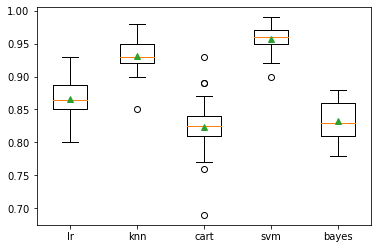

In [42]:
# obtenemos el dataset
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
    n_redundant=5, random_state=1)
    return X, y


X, y = get_dataset()
# obtenemos los modelos
models = get_models()

# Creamos la lista de resultados y de nombres
results, names = list(), list()
for name, model in models.items():
    # Para cada modelo lo evaluamos
    scores = evaluate_model(model, X, y)
    # almacenamos los resultados
    results.append(scores)
    names.append(name)
    # imprimimos un resumen de los resultados
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# Para comparar obtenemos un gráfico box-plot
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Observando el gráfico anterior, se puede concluir que los métodos Knn y svm son los que ofrecen mejores resultados.

En el ejemplo anterior, cada método ha trabajado de una forma totalmente independiente y cada uno ha sacado sus predicciones. A continuación de lo que se trata es de combinar esos modelos en uno único que permita generar también un resultado único. Para obtener esto vamos a definir un función denominada *get_stacking()* que nos ayudará a obtener el resultado que buscamos.


In [47]:
# definimos la función antes refernciada
def get_stacking():
    # definimos los modelos base
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # definimos el meta-modelo
    level1 = LogisticRegression()
    # definimos el ensamble stacking
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

Modificamos la función *get_models()* definida previamente para incluir el meta-modelo que se ha construido anteriormente

In [48]:
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

Ahora obtenemos los resultados, pero añadiendo el modelo de tipo stacking definido anteriormente.

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.828 (0.047)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)
>stacking 0.964 (0.017)


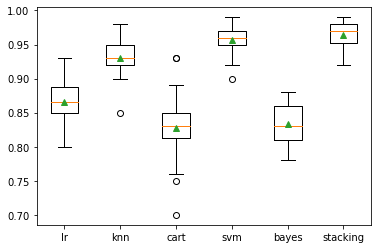

In [50]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

# obtenemos el dataset
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
    n_redundant=5, random_state=1)
    return X, y


X, y = get_dataset()
# obtenemos los modelos
models = get_models()

# Creamos la lista de resultados y de nombres
results, names = list(), list()
for name, model in models.items():
    # Para cada modelo lo evaluamos
    scores = evaluate_model(model, X, y)
    # almacenamos los resultados
    results.append(scores)
    names.append(name)
    # imprimimos un resumen de los resultados
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# Para comparar obtenemos un gráfico box-plot
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Ahora ya tendríamos entrenado nuestro modelo, para poder hacer predicciones con él.

```{index} XGBoost
```

(xgboost)=
## XGBoost.

Extreme Gradient Boosting (su acrónimo XCBoost) es una librería de tipo open-source que implementa de forma bastante eficiente el algoritmo denominado <a href="https://en.wikipedia.org/wiki/Gradient_boosting", target="_blank">*gradient boosting* </a>.

Los modelos van a ser ajustados usando una determinada función de pérdida, que tiene que ser diferenciable, para poder aplicar el algoritmo del <a href="https://www.youtube.com/watch?v=sDv4f4s2SB8", target="_blank" > gradiente descendente</a>.

En este algoritmo, se necesitan al menos los siguientes elementos:
 
1.- La **función de pérdida** que se va a optimizar. Esta función depende del tipo de problema que se quiera resolver, pero ha de cumplir el requisito de que debe ser diferenciable. Por ejemplo si estamos en un problema de regresión, se podría utilizar MSE (mean square error) o MAE (mean absolute error).

2.- **Modelos de aprendizaje débil** (Weak Learner). En gradient boosting se utilizan los árboles de decisión como aprendiz débil. En concreto, se utilizan árboles de regresión que producen valores reales para las divisiones realizadas y que además tienen la ventaja de que pueden sumarse lo que permite que las salidas de los modelos posteriores se sumen y corrijan los residuos en las predicciones.

3.- **Modelos aditivos**. Los árboles se añaden de uno en uno, y los existentes en el modelo no se modifican. Se utiliza un procedimiento de gradiente descendente para minimizar la pérdida al añadir árboles. Tradicionalmente, el descenso de gradiente
se utiliza para minimizar un conjunto de parámetros, como los coeficientes de una ecuación de regresión o los pesos de una red neuronal. Tras calcular el error o la pérdida, los pesos se actualizan para minimizar ese error.

La librería de XGBoost se puede encontrar <a href="https://xgboost.readthedocs.io/en/latest/index.html" target="_blank">en este enlace</a> y ahí se pueden ver todas sus características, y en concreto el formato a seguir para su instalación en Python, que es el siguiente.

<pre><code>
sudo pip install xgboost
</code></pre>

Se puede confirmar que se ha instalado XGBoost, así como la versión con la que se trabaja, mediante el siguiente código.

In [52]:
import xgboost
xgboost.__version__

'1.5.2'

Al igual que ocurre con los métodos de ensemble en scikit learn, también existen dos clases denominadas <a herf="https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor" target="_blank">XGBRegressor /a> y <a href="https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier" target="_blank">XGBClassifier </a>. Ambos modelos funcionan de  manera muy similar y toman los mismos argumentos que influyen en la creación de los árboles de decisión y su incorporación al conjunto.
    
Se utiliza la aleatoriedad en la construcción del modelo. Esto significa que cada vez que el algoritmo se ejecuta en los mismos datos, producirá un modelo ligeramente diferente.
    
A continuación construimos un modelo para clasificación. Primero construimos un conjunto de datos artificiales con *make_classification()*.

In [53]:
# importamos la clase correspondiente
from sklearn.datasets import make_classification
# generamos el dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           n_redundant=5, random_state=7)
# imprimimos un resumen de los datos
print(X.shape, y.shape)

(1000, 20) (1000,)


Ahora construimos el modelo y lo evaluamos usando una validación cruzada utilizando la clase *RepeatedStratifiedKFold*.

In [54]:
# Ejemplo de uso de XGBClassifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
# definimos dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# definimos el modelo con todos parámetros por defecto
model = XGBClassifier()
# evaluación del modelo
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracidad: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracidad: 0.925 (0.028)


Se puden hacer predicciones de la siguiente manera

In [56]:

from numpy import asarray
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
# definimos conjunto de datos
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# definimos el modelo
model = XGBClassifier(use_label_encoder=False)
# ajustamos al modelo
model.fit(X, y)
# Hacemos una predicción
row = [0.2929949,-4.21223056,-1.288332,-2.17849815,-0.64527665,2.58097719,0.28422388,-7.1827928,-1.91211104,2.73729512,0.81395695,3.96973717,-2.66939799,3.34692332,4.19791821,0.99990998,-0.30201875,-4.43170633,-2.82646737,0.44916808]
row = asarray([row])
yhat = model.predict(row)
print('Clase Predicha: %d' % yhat[0])

[12:16:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Clase Predicha: 1


Un ejemplo de regresión puede ser el siguiente:

In [57]:
# modelo de regresión para xgboost
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
#  generamos los datos
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# definimos el modelo
model = XGBRegressor()
# evaluamos el modelo
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -76.447 (3.859)


Las predicciones las obtendríamos utilizando el siguiente formato

In [58]:

from numpy import asarray
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
# generación dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# definición del modelo
model = XGBRegressor()
# ajsute del modelo
model.fit(X, y)
# obtención de una predicción
row = [0.20543991,-0.97049844,-0.81403429,-0.23842689,-0.60704084,-0.48541492,0.53113006,2.01834338,-0.90745243,-1.85859731,-1.02334791,-0.6877744,0.60984819,-0.70630121,-1.29161497,1.32385441,1.42150747,1.26567231,2.56569098,-0.11154792]
row = asarray([row])
yhat = model.predict(row)
print('La predicción obtenida es : %d' % yhat[0])

La predicción obtenida es : 50


### Parámetros importantes del XGBoost.

En este modelo se pueden utilizar para un mejor ajuste del modelo una buena cantidad de hiperparámetros y en lo que sigue se va a proceder a mostrar los más importantes.

#### Número de árboles.

Un importante hiperparámetro a utilizar en este modelo, es el número de árboles de decisión a tener en cuenta en el ajuste. Esto se consigue utilizando el hiperparámetro *n_estimators*. Veamos el efecto del mismo, gracias al siguiente ejemplo.

>10 0.885 (0.029)
>50 0.915 (0.029)
>100 0.925 (0.028)
>500 0.927 (0.028)
>1000 0.926 (0.028)
>5000 0.925 (0.027)


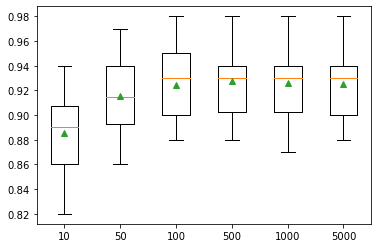

In [59]:
# cambiamos el número de árboles de ddecisión en xhboost
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot

# función para obtener los datos
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

# definimos varios modelo, cambiando n_estimators
def get_models():
	models = dict()
	trees = [10, 50, 100, 500, 1000, 5000]
	for n in trees:
		models[str(n)] = XGBClassifier(n_estimators=n)
    # Devuelve un diccionario con los distintos modelos
	return models

# función para evaluar el modelo utilizando  cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# obtenemos los datos
X, y = get_dataset()
# obtenemos los modelos
models = get_models()
# evaluamos el modelo y alamacenamos los resultados
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# para poder comparar, hacemos un bosplot de cada modelo
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### Profundidad del árbol.

Otro hiperparámetro importante es *max_depth* para indicar el nivel de profundidad de los árboles de decisión que se debe considerar en el modelo.

>1 0.849 (0.028)
>2 0.906 (0.032)
>3 0.926 (0.027)
>4 0.930 (0.027)
>5 0.924 (0.031)
>6 0.925 (0.028)
>7 0.926 (0.030)
>8 0.926 (0.029)
>9 0.921 (0.032)
>10 0.923 (0.035)


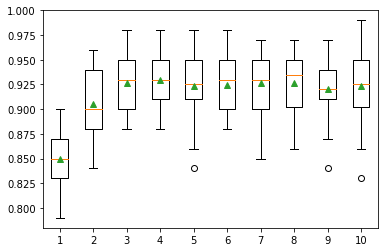

In [60]:
# nivel de profundidad de los árboles de decisión
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot

# fnción para generar los datos
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

# generación diccionario con los modelo a usar 
def get_models():
	models = dict()
	for i in range(1,11):
		models[str(i)] = XGBClassifier(max_depth=i)
	return models

# evaluación de llos modelos
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# obtenemos los datos
X, y = get_dataset()
# sacamos los modelos
models = get_models()
# evaluación y almacenamiento de los resultados
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot de los modelos
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Podemos ver la tendencia general de aumentar el rendimiento del modelo con la profundidad del árbol hasta un punto, después del cual el rendimiento empieza a ser plano o incluso se degrada con los árboles sobreespecializados.

#### Learning rate (tasa de aprendizaje).

La tasa de aprendizaje controla la cantidad de contribución que cada modelo tiene en la predicción del conjunto.

Las tasas más pequeñas pueden requerir más árboles de decisión en el conjunto.

La tasa de aprendizaje puede controlarse mediante el argumento *eta* y su valor predeterminado es 0,3.

>0.0001 0.804 (0.039)
>0.0010 0.814 (0.037)
>0.0100 0.867 (0.027)
>0.1000 0.923 (0.030)
>1.0000 0.913 (0.030)


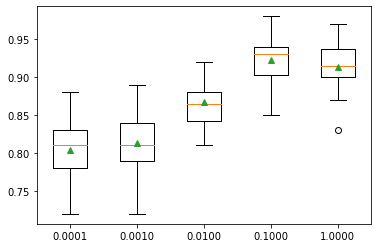

In [61]:
# tasa de aprendizaje en  xgboost 
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot

def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

# generamos modelos con diferentes tasas de aprendizaje
def get_models():
	models = dict()
	rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
	for r in rates:
		key = '%.4f' % r
		models[key] = XGBClassifier(eta=r)
	return models


def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores


X, y = get_dataset()

models = get_models()

results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# gráfico con los resultados obtenidos
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Podemos ver la tendencia general de aumentar el rendimiento del modelo con el incremento de la tasa de aprendizaje de 0,1, después de lo cual el rendimiento se degrada.

#### Número de muestras.

El número de muestras utilizadas para ajustar cada árbol se puede variar y ajustar a las necesidades de cada modelo. Esto significa que cada árbol se ajusta a un subconjunto seleccionado al azar del conjunto de datos de entrenamiento.

Utilizar menos muestras introduce más varianza para cada árbol, aunque puede mejorar el rendimiento general del modelo.

El número de muestras utilizadas para ajustar cada árbol se especifica con el argumento *subsample* y puede establecerse como una fracción del tamaño del conjunto de datos de entrenamiento. Por defecto, se fija en 1,0 para utilizar todo el conjunto de datos de entrenamiento.

El ejemplo siguiente demuestra el efecto del tamaño de la muestra en el rendimiento del modelo con proporciones que varían del 10 al 100 por ciento en incrementos del 10 por ciento.



>0.1 0.876 (0.027)
>0.2 0.912 (0.033)
>0.3 0.917 (0.032)
>0.4 0.925 (0.026)
>0.5 0.928 (0.027)
>0.6 0.926 (0.024)
>0.7 0.925 (0.031)
>0.8 0.928 (0.028)
>0.9 0.928 (0.025)
>1.0 0.925 (0.028)


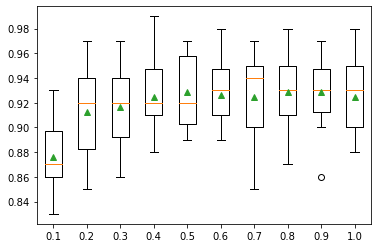

In [63]:
from numpy import arange

def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

# función para generar los modelos
def get_models():
	models = dict()
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		models[key] = XGBClassifier(subsample=i)
	return models


def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

#
X, y = get_dataset()

models = get_models()

results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot modelos
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### Número de features.

Se puede variar el número de features utilizados para ajustar cada árbol de decisión.

Al igual que el cambio del número de muestras, el cambio del número de features introduce una varianza adicional en el modelo, lo que puede mejorar el rendimiento, aunque podría requerir un aumento del número de árboles.

El número de features utilizadas por cada árbol se toma como una muestra aleatoria y se especifica mediante el argumento *colsample_bytree* y, por defecto, todas las características del conjunto de datos de entrenamiento, por ejemplo, el 100% o un valor de 1,0. También se pueden muestrear columnas para cada división, y esto se controla con el argumento *colsample_bylevel*.



>0.1 0.849 (0.032)
>0.2 0.913 (0.028)
>0.3 0.913 (0.033)
>0.4 0.922 (0.027)
>0.5 0.925 (0.028)
>0.6 0.926 (0.029)
>0.7 0.930 (0.029)
>0.8 0.928 (0.026)
>0.9 0.931 (0.030)
>1.0 0.925 (0.028)


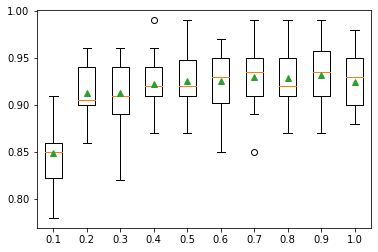

In [64]:


def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

def get_models():
	models = dict()
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		models[key] = XGBClassifier(colsample_bytree=i)
	return models


def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores


X, y = get_dataset()

models = get_models()

results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot de los modelos
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Random Forest (bosques aleatorios).

El algoritmo Random Forest es un ensamble de árboles de decisión, y constituye una extensión de los métodos bootstrap aggregation (bagging) de árboles de decisión que puede ser utilizado tanto para regresión como para clasificación. Debido a que el método base es detipo bagging, se hace una serie de muestras con reemplazamiento que servirá cada una de estas muestras para entrenar el árbol de decisión correspondiente.

Por lo tanto, en este tipo de modelos, tendremos tantas predicciones como muestras bootstrap tengamos, y entonce la predicción última o final depende del tipo de modelo que estemos ajustando.

Si el modelo es de regresión, entonces la predicción final se hace en base a la media de todas las medias que se hayan obtenido. Si el modelo es de clasificación, entonces la predicción final se hace en base al voto mayoritario que se obtenga en los modelos base.

El modelo de bosque aleatorio también implica la posibilidad de hacer selección de un subconjunto de características de entrada (features, columnas o variables) en cada punto de división en la construcción de los árboles. 

Al reducir las características o features a un subconjunto aleatorio que puede considerarse en cada punto de división obliga a cada árbol de decisión del conjunto a ser más diferente que los obtenidos en otros pasos.

El efecto obtenido con este procedimiento de selección de features o columnas es que las predicciones, y a su vez, los errores de predicción, realizados por cada árbol del conjunto son más diferentes o están menos correlacionados.
Cuando las predicciones de estos árboles menos correlacionados se promedian para hacer una predicción, a menudo se obtiene una acuracidad mejor. Por este motivo, tal vez el hiperparámetro más importante que hay que ajustar para el bosque aleatorio es el número de características aleatorias a considerar en cada punto de división.

En este sentido, y aunque sólo es una recomendación, el número de features a seleccionar se sugiere sean las siguientes:

* Para problemas de regresión, elegir el número total de features o columnas dividido entre tres.


* Para problemas de clasificación, elegir como valor la raíz cuadrada del total de features.

Otro hiperparámetro importante a ajustar en estos modelos es la profundidad de los árboles de decisión. Los árboles más profundos suelen ser más abiertos a los datos de entrenamiento, pero también menos correlacionados, lo que a su vez puede mejorar el rendimiento del conjunto. Los niveles de profundidad de 1 a 10 niveles pueden ser eficaces. Por último, para decidir el número de árboles de decisión a tener en cuenta en el conjunto, a menudo lo que se hace es aumentarlo hasta que no se observa ninguna no se observe ninguna mejora en el resultado final, o esta sea mínima.

En scikit learn, existen dos clases para utilizar este tipo de ensambles: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html" target="_blank">RandomForestRegressor </a> y <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html" target="_blank">RandomForestClassifier</a>. Ambos modelos tienen una serie de hiperparámetros muy similares y dada la naturaleza estocástica del procedimiento, no siempre se obtienen resultados iguales.

### Ejemplo de clasificación.

Veamos a continuación un ejemplo de uso de clasificación de este modelo en base a una serie de datos artificiales obtenidos con la función *make_clasification()* 

In [65]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# obtenemos el conjunto de datos
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=3)
# definimos el modelo con los parámetros por defecto
model = RandomForestClassifier()
# hacemos una evaluación el modelo
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# sacamos la acuracidad media
print('Acuracidad media: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Acuracidad media: 0.902 (0.023)


Para hacer una predicción lo haríamos de la siguiente manera

In [66]:

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=3)

model = RandomForestClassifier()
# Ajustamos el modelo
model.fit(X, y)
# Hacemos una simple predicción
row = [-8.52381793, 5.24451077, -12.14967704, -2.92949242, 0.99314133, 0.67326595,
-0.38657932, 1.27955683, -0.60712621, 3.20807316, 0.60504151, -1.38706415, 8.92444588,
-7.43027595, -2.33653219, 1.10358169, 0.21547782, 1.05057966, 0.6975331, 0.26076035]
yhat = model.predict([row])
# imprimimos la prediccióon
print('La clase predicha es: %d' % yhat[0])

Predicted Class: 0


### Ejemplo de regresión.

Para este ejemplo, también vamos a obtener una serie de datos artificiales mediante la función make_regression()

In [67]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
# obtenemos los datos artificiales
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1,
random_state=2)
# definimos el modelo con parámetros por defecto
model = RandomForestRegressor()
# definimos la validación 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluamos el modelo
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# imprimimos el resultado de la evaluación del modelo
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -90.329 (7.945)


En este caso también se pueden hacer predicciones utilizando para ello el método *predict()*

In [69]:
# ajustamos el modelo a los datos 
model.fit(X, y)
# datos para hacer la prediccón
row = [-0.89483109, -1.0670149, -0.25448694, -0.53850126, 0.21082105, 1.37435592,
0.71203659, 0.73093031, -1.25878104, -2.01656886, 0.51906798, 0.62767387, 0.96250155,
1.31410617, -1.25527295, -0.85079036, 0.24129757, -0.17571721, -1.11454339, 0.36268268]
yhat = model.predict([row])
# imprimimos la predicción.
print('Predicción obtenida: %d' % yhat[0])

Predicción obtenida: -164


### Hiperparámetros de Random Forest.

En estas clases existen una serie importante de hiperparámetros que sirven para mejorar los ajustes del modelo. En este apartado vamos a ver los más importantes.

#### Tamaño de las muestras.

Se puede configurar esta clase para que no se haga ningún tipo de submuestreo, y en este caso, los árboles de decisión se ajustarán en base a la información que proporcionan todos los datos de entrenamiento con los que se cuente. Esto se consigue con el hiperparámetro *bootstrap* que admite un valor booleano, de tal manera que si su valor es false, entonces no se realiza submuestreo.

Igualmente se pueden definir los tamaños de las muestras, en el caso de realizar submuestreo. Esto se configura con el hiperparámetro *max_samples* que es un valor entre 0 y 1 y mediante el cual se controla el porcentaje de muestra con reemplazamiento que se desea obtener.

Veamos con el siguiente ejemplo, el efecto en la acuracidad que se obtiene en el modelo, cambiando este parámetro.

>0.1 0.860 (0.028)
>0.2 0.881 (0.025)
>0.3 0.889 (0.026)
>0.4 0.890 (0.027)
>0.5 0.892 (0.025)
>0.6 0.900 (0.028)
>0.7 0.899 (0.027)
>0.8 0.906 (0.027)
>0.9 0.899 (0.026)
>1.0 0.902 (0.025)


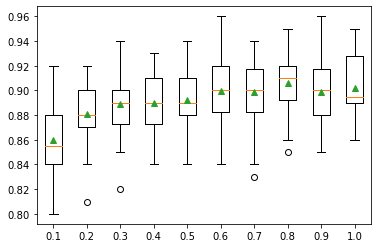

In [73]:
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# función para generar los datos
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
        n_redundant=5, random_state=3)
    return X, y
# función para generar un diccionario de modelos
def get_models():
    models = dict()
    # definimos porcentajes desde 10% to 100% incrementados en un  10% 
    for i in arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        # poner max_samples=None para usar el  100% de los datos
        if i == 1.0:
            i = None
        models[key] = RandomForestClassifier(max_samples=i)
    return models

# evaluamos el modelo usando cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores


# obtenemos los datos
X, y = get_dataset()
# Obtenemos los modelos
models = get_models()
# evaluamos modelo y almacenamos resultado
results, names = list(), list()
for name, model in models.items():
    # evaluación del modelo
    scores = evaluate_model(model, X, y)
    # almacenamos resultados
    results.append(scores)
    names.append(name)
    # imprimimos la acuracidad para cada paso
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot los modelos
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### Configurando el número de features.

El número de features a tener en cuenta, se configura mediante el hiperparámetro *max_features* que por defecto tiene un valor es igual a la raíz cuadrada del número total de features que tiene el dataset.

Los valores que puede tomar este hiperparámetro son:

* Un valor entero. En este caso se elige el número de   features indicadas en ese valor.

* Un valor de tipo float. En este caso se indican el porcentaje de features a considerar.

* Un valor igual a "auto". En este caso max_features = n_features.

* Un valor igual a "sqrt". En este caso max_features = sqrt(n_features). Es el valor por defecto.

* Un valor igual a "log2". En este caso max_features = log2(n_features)

* Un valor igual a None o 1.0. En este caso max_features = n_features.

#### Configurando el número de árboles de dicisión.

Otro factor muy influyente a la hora de trabajar con bosques aleatorios, es el número de árboles de decisión que deben tenerse en cuenta. Para configurar este valor se dispone del parámetro *n_estimatros* que por defecto tiene un valor igual a 100.

#### Configurando la profundidad de los árboles de decisión.

Se configura con el hiperparámetros *max_depth* que por defecto tiene un valor de None, que indica que los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos muestras que min_samples_split. Un valor concreto para este hiperparámetro indica la máxima profundidad que se permite alcanzar cuando se construyen los árboles de decisión.

>1 0.767 (0.041)
>2 0.806 (0.034)
>3 0.839 (0.035)
>4 0.856 (0.033)
>5 0.874 (0.027)
>6 0.882 (0.020)
>7 0.888 (0.025)
>None 0.903 (0.020)


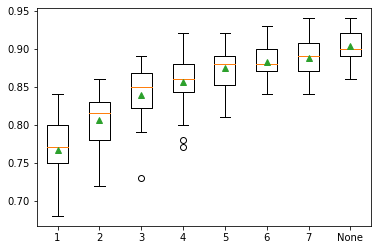

In [75]:
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
        n_redundant=5, random_state=3)
    return X, y

# generar un diccionario de modelos
def get_models():
    models = dict()
    # definimos la profundidad de los modelos
    depths = [i for i in range(1,8)] + [None]
    for n in depths:
        models[str(n)] = RandomForestClassifier(max_depth=n)
    return models

# evaluación del modelo con cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores


X, y = get_dataset()

models = get_models()

results, names = list(), list()
for name, model in models.items():

    scores = evaluate_model(model, X, y)
    # almacenamos resultados
    results.append(scores)
    names.append(name)
    # resumen de resultados
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot modelos para comparación
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()